In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import squarify 
import plotly.express as px
%matplotlib inline

# EDA of the university majors

In [4]:
majors = pd.read_csv("../College-Entrance-Examination---ML/data/majors.csv")

In [5]:
majors.head()

,Unnamed: 0,id_major,id_university,type,major_name,capacity
0,0,1111014,111,science,PENDIDIKAN DOKTER HEWAN,88
1,1,1111022,111,science,TEKNIK SIPIL,64
2,2,1111037,111,science,TEKNIK MESIN,48
3,3,1111045,111,science,TEKNIK KIMIA,48
4,4,1111053,111,science,ARSITEKTUR,48


In [6]:
majors.isna().sum()

Unnamed: 0       0
id_major         0
id_university    0
type             0
major_name       0
capacity         0
dtype: int64

In [7]:
majors.dtypes

Unnamed: 0        int64
id_major          int64
id_university     int64
type             object
major_name       object
capacity          int64
dtype: object

In [8]:
majors.drop(["Unnamed: 0"], axis = 1, inplace = True)

In [9]:
majors

,id_major,id_university,type,major_name,capacity
0,1111014,111,science,PENDIDIKAN DOKTER HEWAN,88
1,1111022,111,science,TEKNIK SIPIL,64
2,1111037,111,science,TEKNIK MESIN,48
3,1111045,111,science,TEKNIK KIMIA,48
4,1111053,111,science,ARSITEKTUR,48
...,...,...,...,...,...
3162,9212011,921,humanities,EKONOMI PEMBANGUNAN,32
3163,9212042,921,humanities,MANAJEMEN,32
3164,9212057,921,humanities,AKUNTANSI,32
3165,9212065,921,humanities,PENDIDIKAN BAHASA INDONESIA,16


# Lets check the total capacity that each school can provide to students

In [10]:
total_capacity = majors.loc[:,["id_university", "major_name", "capacity"]].groupby(["id_university"]).sum()
total_capacity

,capacity
id_university,
111,2824
112,2190
113,945
114,704
115,72
...,...
821,1272
911,894
912,1130


In [11]:
majors [majors.id_university == 111].capacity.sum()

2824

In [12]:
majors.capacity.sum()

162108

In [13]:
# how many majors available
majors.loc[:,['major_name']].value_counts()

major_name                  
MANAJEMEN                       63
AKUNTANSI                       59
MATEMATIKA                      55
BIOLOGI                         54
KIMIA                           52
                                ..
PEND BHS, SATRA IND & DAERAH     1
PEND BIOLOGI                     1
PEND EKONOMI                     1
PEND EKONOMI S1                  1
TV DAN FILM                      1
Length: 854, dtype: int64

In [14]:
majors_count = majors.major_name.value_counts()[:10]

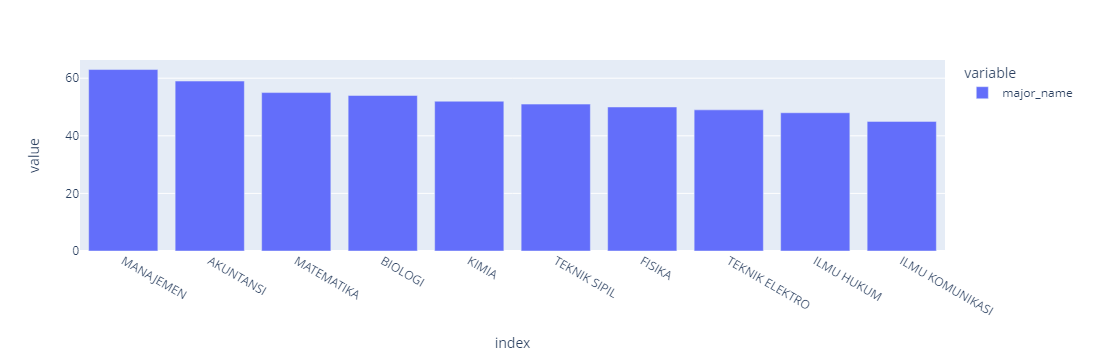

In [15]:
fig = px.bar(majors_count)
fig.show()

MANAJEMEN          63
AKUNTANSI          59
MATEMATIKA         55
BIOLOGI            54
KIMIA              52
TEKNIK SIPIL       51
FISIKA             50
TEKNIK ELEKTRO     49
ILMU HUKUM         48
ILMU KOMUNIKASI    45
Name: major_name, dtype: int64

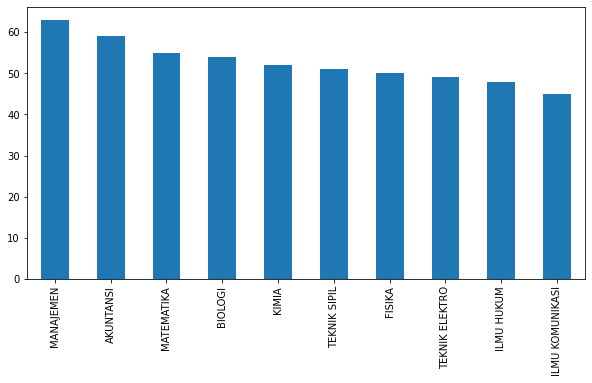

In [16]:
fig, ax = plt.subplots(1,figsize=(10, 5))
majors_count.plot(kind = "bar")
majors_count

In [17]:
# how many univerisities
majors.id_university.value_counts()

334    81
372    75
751    74
356    69
712    68
       ..
613    10
172     9
115     6
335     5
913     5
Name: id_university, Length: 85, dtype: int64

<AxesSubplot:>

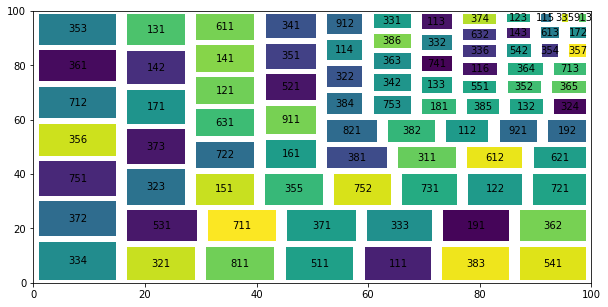

In [18]:
fig,ax =plt.subplots(figsize = (10,5))
squarify.plot(majors.id_university.value_counts(), label = majors.id_university.value_counts().index, pad = True)

In [19]:
# EDA of the universities dataset
university = pd.read_csv("../College-Entrance-Examination---ML/data/universities.csv", index_col= False, usecols= [1,2])
university

,id_university,university_name
0,111,UNIVERSITAS SYIAH KUALA
1,112,UNIVERSITAS MALIKUSSALEH
2,113,UNIVERSITAS TEUKU UMAR
3,114,UNIVERSITAS SAMUDRA
4,115,ISBI ACEH
...,...,...
80,821,UNIVERSITAS KHAIRUN
81,911,UNIVERSITAS CENDERAWASIH
82,912,UNIVERSITAS MUSAMUS MERAUKE
83,913,ISBI TANAH PAPUA


In [20]:
university.university_name.value_counts().head()

UNIVERSITAS SYIAH KUALA          1
UNIVERSITAS TRUNOJOYO MADURA     1
UNIVERSITAS BORNEO TARAKAN       1
INSTITUT TEKNOLOGI KALIMANTAN    1
UNIVERSITAS MULAWARMAN           1
Name: university_name, dtype: int64

<AxesSubplot:>

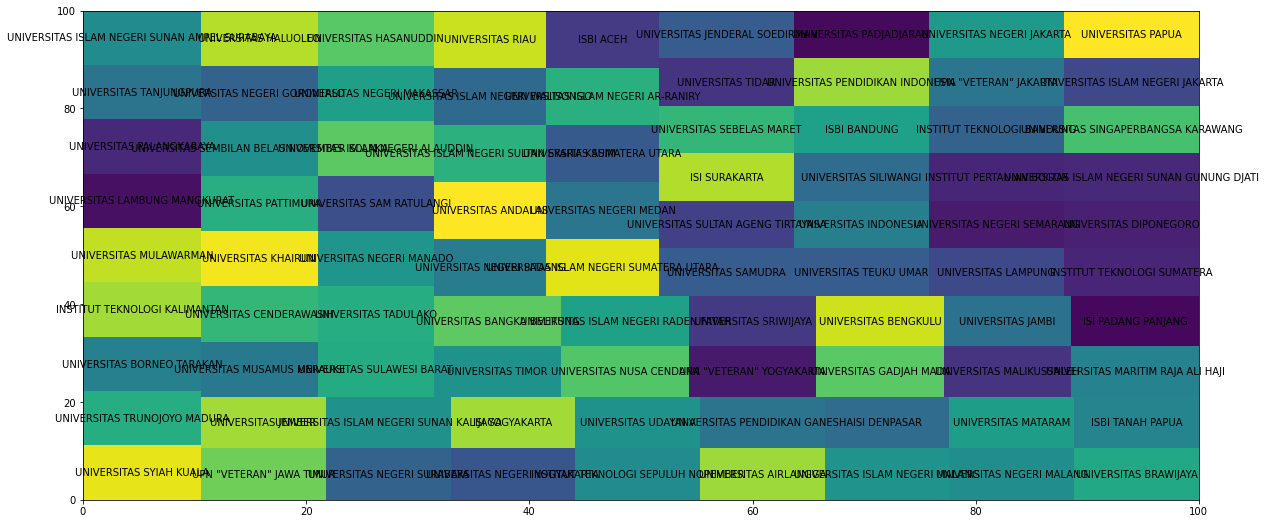

In [21]:
fig, ax= plt.subplots(figsize= (20, 9))
squarify.plot(university.university_name.value_counts(), label = university.university_name.value_counts().index, ax = ax)

In [22]:
humanity_scores = pd.read_csv("../College-Entrance-Examination---ML/data/score_humanities.csv")
humanity_scores.drop(["Unnamed: 0"], axis = 1).head()

,id_first_major,id_first_university,id_second_major,id_second_university,id_user,score_eko,score_geo,score_kmb,score_kpu,score_kua,score_mat,score_ppu,score_sej,score_sos
0,3322014,332,3532154,353,26,778,486,679,594,643,686,559,392,676
1,3212057,321,3322022,332,35,579,631,710,700,810,656,638,535,686
2,3722057,372,1912042,191,44,600,481,314,432,522,494,461,467,574
3,3212081,321,3212301,321,55,559,563,646,638,591,538,585,647,589
4,3812106,381,3852034,385,171,838,734,654,613,690,315,628,660,674


In [23]:
# lets rename the columns for the humanity related subjects better identificatio of course areas
humanity_scores.rename({"score_eko": "economics", "score_geo":"geography", "score_kmb" :"Reading Compr. & Writing"\
    ,"score_kpu": "General Reasoning","score_kua": "Quantitative Skills","score_mat":"maths","score_ppu": "General Knowledge & Understanding",\
        "score_sej":"history", "score_sos":"sociology"}, axis = 1,  inplace = True)

In [24]:
humanity_scores.head()

,Unnamed: 0,id_first_major,id_first_university,id_second_major,id_second_university,id_user,economics,geography,Reading Compr. & Writing,General Reasoning,Quantitative Skills,maths,General Knowledge & Understanding,history,sociology
0,0,3322014,332,3532154,353,26,778,486,679,594,643,686,559,392,676
1,1,3212057,321,3322022,332,35,579,631,710,700,810,656,638,535,686
2,2,3722057,372,1912042,191,44,600,481,314,432,522,494,461,467,574
3,3,3212081,321,3212301,321,55,559,563,646,638,591,538,585,647,589
4,4,3812106,381,3852034,385,171,838,734,654,613,690,315,628,660,674


In [25]:
science_scores = pd.read_csv("../College-Entrance-Examination---ML/data/score_science.csv")
science_scores.drop(["Unnamed: 0"], axis = 1, inplace = True)

In [26]:
# lets rename the columns for the science related subjects better identificatio of course areas
science_scores.rename({"score_bio": "biology", "score_fis": "physics","score_kim":"chemistry","score_kmb": \
    "Reading Compr. & Writing","score_kpu":"General Reasoning", "score_kua" : "Quantitative Skills" , "score_mat" :"maths", "score_ppu": "General Knowledge & Understanding"}, axis = 1, inplace = True)

In [27]:
science_scores.head()

,id_first_major,id_first_university,id_second_major,id_second_university,id_user,biology,physics,chemistry,Reading Compr. & Writing,General Reasoning,Quantitative Skills,maths,General Knowledge & Understanding
0,3321065,332,3331187,333,4,400,400,400,400,400,400,400,400
1,3211015,321,3611066,361,14,816,666,651,678,685,706,695,562
2,3721093,372,3551302,355,19,562,839,624,700,781,464,551,668
3,3321096,332,3551194,355,23,700,669,692,679,692,813,507,573
4,5211104,521,5211085,521,28,461,619,441,593,563,500,666,370


# lets define core subjects that are unique in the social science sand humanity courses

In [28]:
# They are Reading Compr. & Writing, General Reasoning, Quantitative skills , maths and General Knowledge & Understanding
humanity_scores.iloc[:,-7:].head()

,Reading Compr. & Writing,General Reasoning,Quantitative Skills,maths,General Knowledge & Understanding,history,sociology
0,679,594,643,686,559,392,676
1,710,700,810,656,638,535,686
2,314,432,522,494,461,467,574
3,646,638,591,538,585,647,589
4,654,613,690,315,628,660,674


In [29]:
# They are Reading Compr. & Writing, General Reasoning, Quantitative skills , maths and General Knowledge & Understanding
science_scores.iloc[:,-7:].head()

,physics,chemistry,Reading Compr. & Writing,General Reasoning,Quantitative Skills,maths,General Knowledge & Understanding
0,400,400,400,400,400,400,400
1,666,651,678,685,706,695,562
2,839,624,700,781,464,551,668
3,669,692,679,692,813,507,573
4,619,441,593,563,500,666,370


In [30]:
equal = []
for h in humanity_scores.columns:
    for s in science_scores.columns:
        if h == s:
            equal.append(h)
        else:
            pass
print(equal)

['id_first_major', 'id_first_university', 'id_second_major', 'id_second_university', 'id_user', 'Reading Compr. & Writing', 'General Reasoning', 'Quantitative Skills', 'maths', 'General Knowledge & Understanding']


We have isolated the compulsory or common subjects, s we will analysis to find the mean

In [31]:
# find the eman of
hum_com = humanity_scores.loc[:,['id_first_major', 'id_first_university', 'id_second_major', 'id_second_university', 'id_user', 'Reading Compr. & Writing', 'General Reasoning', 'Quantitative Skills', 'maths', 'General Knowledge & Understanding']]

In [32]:
sci_com = science_scores.loc[:,['id_first_major', 'id_first_university', 'id_second_major', 'id_second_university', 'id_user', 'Reading Compr. & Writing', 'General Reasoning', 'Quantitative Skills', 'maths', 'General Knowledge & Understanding']]

In [33]:
pd.merge(hum_com, sci_com, left_index= True, right_index= True, how = "outer")

,id_first_major_x,id_first_university_x,id_second_major_x,id_second_university_x,id_user_x,Reading Compr. & Writing_x,General Reasoning_x,Quantitative Skills_x,maths_x,General Knowledge & Understanding_x,id_first_major_y,id_first_university_y,id_second_major_y,id_second_university_y,id_user_y,Reading Compr. & Writing_y,General Reasoning_y,Quantitative Skills_y,maths_y,General Knowledge & Understanding_y
0,3322014.0,332.0,3532154.0,353.0,26.0,679.0,594.0,643.0,686.0,559.0,3321065,332,3331187,333,4,400,400,400,400,400
1,3212057.0,321.0,3322022.0,332.0,35.0,710.0,700.0,810.0,656.0,638.0,3211015,321,3611066,361,14,678,685,706,695,562
2,3722057.0,372.0,1912042.0,191.0,44.0,314.0,432.0,522.0,494.0,461.0,3721093,372,3551302,355,19,700,781,464,551,668
3,3212081.0,321.0,3212301.0,321.0,55.0,646.0,638.0,591.0,538.0,585.0,3321096,332,3551194,355,23,679,692,813,507,573
4,3812106.0,381.0,3852034.0,385.0,171.0,654.0,613.0,690.0,315.0,628.0,5211104,521,5211085,521,28,593,563,500,666,370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1411161,141,1421147,142,344111,546,523,490,549,520
86566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3561262,356,3571055,357,344125,613,461,390,399,554
86567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3531182,353,3561022,356,344127,474,494,483,327,554
86568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1121094,112,1221095,122,344151,437,447,485,508,492


In [34]:
hum_com.shape, sci_com.shape

((61202, 10), (86570, 10))

In [35]:
# lets add the total score

In [36]:
# Lets analyze in terms of weighted average the possibility of gaining admission with humanity scores
hum_com.head()

,id_first_major,id_first_university,id_second_major,id_second_university,id_user,Reading Compr. & Writing,General Reasoning,Quantitative Skills,maths,General Knowledge & Understanding
0,3322014,332,3532154,353,26,679,594,643,686,559
1,3212057,321,3322022,332,35,710,700,810,656,638
2,3722057,372,1912042,191,44,314,432,522,494,461
3,3212081,321,3212301,321,55,646,638,591,538,585
4,3812106,381,3852034,385,171,654,613,690,315,628


In [37]:
# checking NaNs for humanity scores
hum_com.isna().sum()

id_first_major                       0
id_first_university                  0
id_second_major                      0
id_second_university                 0
id_user                              0
Reading Compr. & Writing             0
General Reasoning                    0
Quantitative Skills                  0
maths                                0
General Knowledge & Understanding    0
dtype: int64

In [38]:
hum_com['sum_humanities'] = hum_com.iloc[:, 5:].sum(axis = 1)
hum_com.head()

,id_first_major,id_first_university,id_second_major,id_second_university,id_user,Reading Compr. & Writing,General Reasoning,Quantitative Skills,maths,General Knowledge & Understanding,sum_humanities
0,3322014,332,3532154,353,26,679,594,643,686,559,3161
1,3212057,321,3322022,332,35,710,700,810,656,638,3514
2,3722057,372,1912042,191,44,314,432,522,494,461,2223
3,3212081,321,3212301,321,55,646,638,591,538,585,2998
4,3812106,381,3852034,385,171,654,613,690,315,628,2900


In [39]:
sci_com['sum_sciences'] = sci_com.iloc[:, 5:].sum(axis = 1)
sci_com.head()

,id_first_major,id_first_university,id_second_major,id_second_university,id_user,Reading Compr. & Writing,General Reasoning,Quantitative Skills,maths,General Knowledge & Understanding,sum_sciences
0,3321065,332,3331187,333,4,400,400,400,400,400,2000
1,3211015,321,3611066,361,14,678,685,706,695,562,3326
2,3721093,372,3551302,355,19,700,781,464,551,668,3164
3,3321096,332,3551194,355,23,679,692,813,507,573,3264
4,5211104,521,5211085,521,28,593,563,500,666,370,2692


# Finding the upper , lower and mid scores for both exam categories

In [40]:
hum_com.sum_humanities.describe().to_frame()

,sum_humanities
count,61202.000000
mean,2674.256070
std,300.995668
min,1496.000000
25%,2470.000000
50%,2664.000000
75%,2871.000000
max,4031.000000


In [41]:
sci_com.sum_sciences.describe()

count    86570.000000
mean      2778.974575
std        317.390939
min       1500.000000
25%       2559.000000
50%       2774.000000
75%       2993.000000
max       4350.000000
Name: sum_sciences, dtype: float64

Text(0.5, 1.0, 'humanities examination')

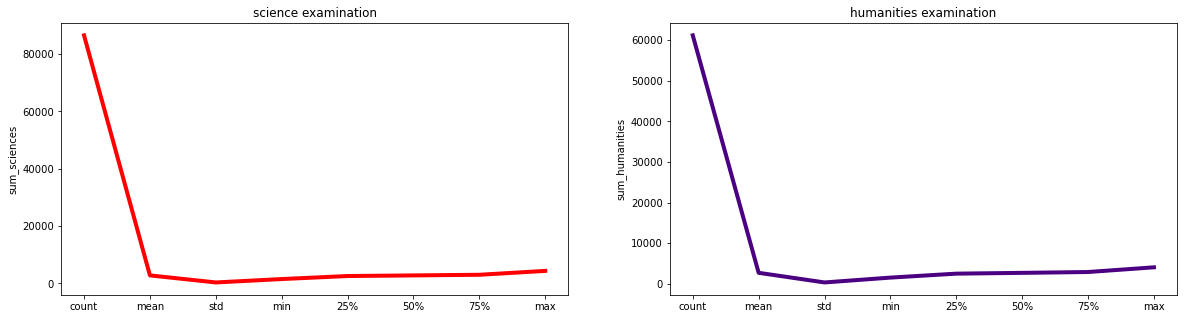

In [42]:
fig,(ax1, ax2) = plt.subplots(figsize = (20,5), nrows=1, ncols=2)
sns.lineplot(data = sci_com.sum_sciences.describe(), ax= ax1, color = "red", linewidth =4)
sns.lineplot( data = hum_com.sum_humanities.describe(), ax= ax2, color = "indigo", linewidth = 4)
ax1.set_title("science examination")
ax2.set_title("humanities examination")

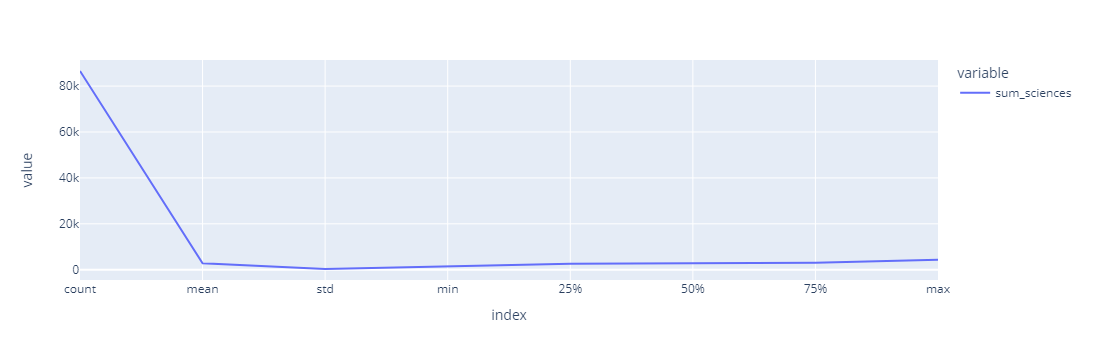

In [43]:
fig = px.line(sci_com.sum_sciences.describe())
fig.show()

# Lets categorize the student scores by thoese within these ranges - starting with Humanity

